In [4]:
# cellpose segítségével maszkok
#majd numpy és pandas segítségével intenzitások (analyzer teszt)

In [6]:
from ImageAnalysis import cellImageAnalysis as ca    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cellpose import models

import importlib

In [10]:
#futtatókörnyezet újraindítása helyett
importlib.reload(ca)

<module 'ImageAnalysis.cellImageAnalysis' from '/home/keoni/projects/cellImageAnalysis/ImageAnalysis/cellImageAnalysis.py'>

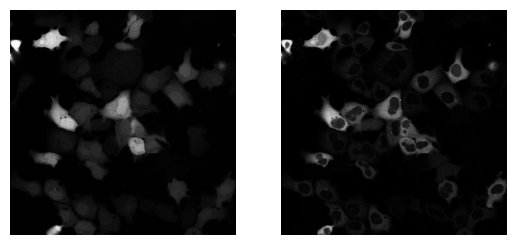

In [22]:
a=ca.Image("data/20230330/JNK1B1_barr2_1.tif")
a.load_image()

a.display_image()

In [35]:
detector = ca.CellposeDetector(0, 1)

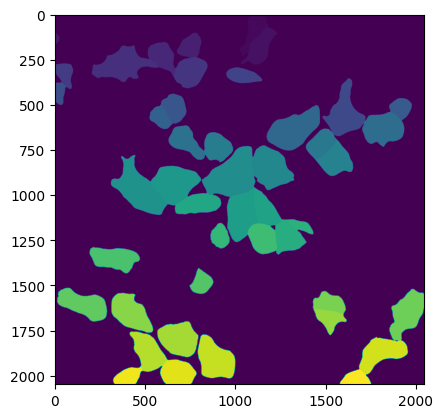

In [36]:
masks = detector.detect_cells(a.image)
plt.imshow(masks)

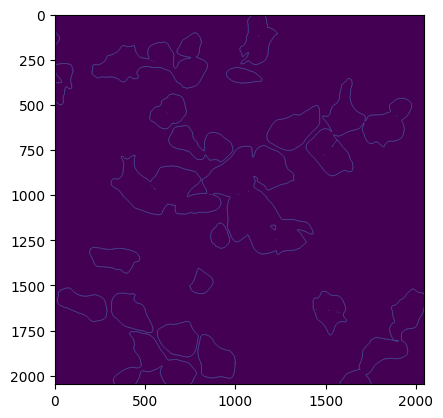

In [37]:
plt.imshow(detector.detect_cell_borders(masks))

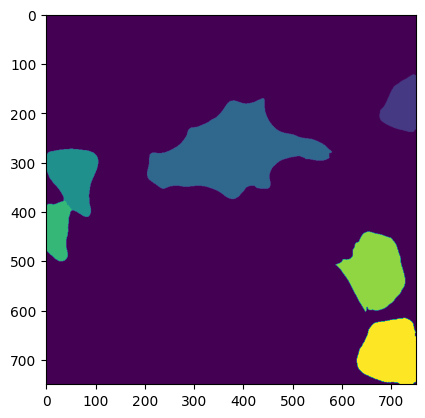

In [23]:
#az egész folyamat a kép egy részletére (gyorsabb)
masks = detector.detect_cells(a.image[:750,:750,:])
plt.imshow(masks)

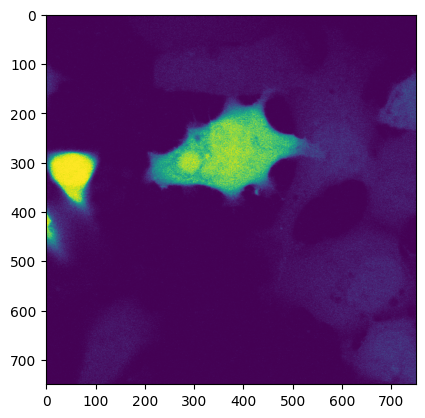

In [17]:
plt.imshow(a.image[:750,:750,0])

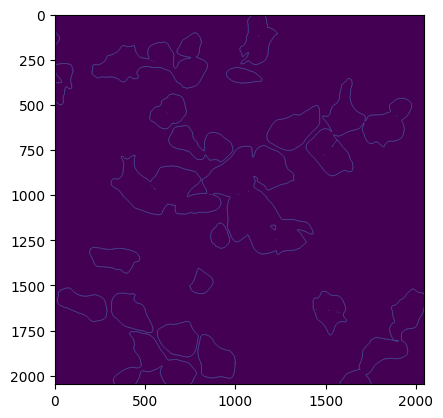

In [38]:
plt.imshow(detector.detect_cell_borders(masks))

In [39]:
class Analyzer:
    
    def __init__(self):
        pass
    
    def get_cell_fluorescence(self, img, masks):
        #az image-ban numpy array ként szerepel a kép
        #masks ban a külön sejtek külön index-szel szerepelnek
        #1 oszlopos array-é alakítjuk a kettőt (párban)
        img = img.reshape(-1,1)
        masks = masks.reshape(-1,1)
        
        #
        joint = np.concatenate((img, masks), axis=1)
        
        result = pd.DataFrame(joint)
        
        result.columns = ["intensity", "mask"]
        
        return result.groupby("mask").mean()

In [40]:
analyzer = Analyzer()

In [41]:
result = analyzer.get_cell_fluorescence(a.image, masks)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 8388608 and the array at index 1 has size 4194304

In [21]:
result

,intensity
mask,
0,102.095162
1,593.305371
2,2464.631594
3,2812.711604
4,988.337425
5,339.792364
6,444.096377
